To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth your local device, follow [our guide](https://docs.unsloth.ai/get-started/install-and-update). This notebook is licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News


Unsloth's [Docker image](https://hub.docker.com/r/unsloth/unsloth) is here! Start training with no setup & environment issues. [Read our Guide](https://docs.unsloth.ai/new/how-to-train-llms-with-unsloth-and-docker).

[gpt-oss RL](https://docs.unsloth.ai/new/gpt-oss-reinforcement-learning) is now supported with the fastest inference & lowest VRAM. Try our [new notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/gpt-oss-(20B)-GRPO.ipynb) which creates kernels!

Introducing [Vision](https://docs.unsloth.ai/new/vision-reinforcement-learning-vlm-rl) and [Standby](https://docs.unsloth.ai/basics/memory-efficient-rl) for RL! Train Qwen, Gemma etc. VLMs with GSPO - even faster with less VRAM.

Unsloth now supports Text-to-Speech (TTS) models. Read our [guide here](https://docs.unsloth.ai/basics/text-to-speech-tts-fine-tuning).

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Unsloth

In [6]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/mistral-7b-v0.3-bnb-4bit",      # New Mistral v3 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/llama-3-8b-bnb-4bit",           # Llama-3 15 trillion tokens model 2x faster!
    "unsloth/llama-3-8b-Instruct-bnb-4bit",
    "unsloth/llama-3-70b-bnb-4bit",
    "unsloth/Phi-3-mini-4k-instruct",        # Phi-3 2x faster!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/mistral-7b-bnb-4bit",
    "unsloth/gemma-7b-bnb-4bit",             # Gemma 2.2x faster!
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "meta-llama/Llama-3.2-3B-Instruct",
    max_seq_length = max_seq_length,
    load_in_4bit = False, # False for LoRA 16bit
    fast_inference = True, # Enable vLLM fast inference
    gpu_memory_utilization = 0.9, # Reduce if out of memory
)


INFO:unsloth_zoo.log: Unsloth: Patching vLLM


INFO 12-03 11:04:23 [vllm_utils.py:689] Unsloth: Patching vLLM v1 graph capture
INFO 12-03 11:04:23 [vllm_utils.py:717] Unsloth: Patching vLLM v0 graph capture
==((====))==  Unsloth 2025.10.3: Fast Llama patching. Transformers: 4.56.2. vLLM: 0.10.2.
   \\   /|    NVIDIA GeForce RTX 4090. Num GPUs = 1. Max memory: 23.988 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu128. CUDA: 8.9. CUDA Toolkit: 12.8. Triton: 3.4.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.33+f204359.d20251014. FA2 = True]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: vLLM loading unsloth/Llama-3.2-3B-Instruct with actual GPU utilization = 84.13%
Unsloth: Your GPU has CUDA compute capability 8.9 with VRAM = 23.99 GB.
Unsloth: Using conservativeness = 1.0. Chunked prefill tokens = 2048. Num Sequences = 256.
Unsloth: vLLM's KV Cache can use up to 14.02 GB. Also swap space = 4 GB.
WARNING 12-03 11:04

`torch_dtype` is deprecated! Use `dtype` instead!


INFO 12-03 11:04:28 [__init__.py:1815] Using max model len 2048
INFO 12-03 11:04:30 [scheduler.py:222] Chunked prefill is enabled with max_num_batched_tokens=2048.
WARNING 12-03 11:04:30 [lora.py:92] `lora_extra_vocab_size` is deprecated and will be removed in v0.12.0. Additional vocabulary support for LoRA adapters is being phased out.
INFO 12-03 11:04:30 [core.py:76] Initializing a V1 LLM engine (v0.10.2) with config: model='unsloth/Llama-3.2-3B-Instruct', speculative_config=None, tokenizer='unsloth/Llama-3.2-3B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace

[W1203 11:04:30.840939499 ProcessGroupNCCL.cpp:981] Warning: TORCH_NCCL_AVOID_RECORD_STREAMS is the default now, this environment variable is thus deprecated. (function operator())


INFO 12-03 11:04:31 [gpu_model_runner.py:2370] Loading model from scratch...
INFO 12-03 11:04:31 [cuda.py:362] Using Flash Attention backend on V1 engine.
INFO 12-03 11:04:31 [weight_utils.py:348] Using model weights format ['*.safetensors']


Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 12-03 11:04:32 [default_loader.py:268] Loading weights took 1.04 seconds
INFO 12-03 11:04:32 [punica_selector.py:19] Using PunicaWrapperGPU.
INFO 12-03 11:04:33 [gpu_model_runner.py:2392] Model loading took 6.2472 GiB and 1.775626 seconds
INFO 12-03 11:04:37 [backends.py:539] Using cache directory: /home/unsloth/.cache/vllm/torch_compile_cache/4098b52d57/rank_0_0/backbone for vLLM's torch.compile
INFO 12-03 11:04:37 [backends.py:550] Dynamo bytecode transform time: 4.18 s
INFO 12-03 11:04:39 [backends.py:161] Directly load the compiled graph(s) for dynamic shape from the cache, took 1.213 s
INFO 12-03 11:04:40 [monitor.py:34] torch.compile takes 4.18 s in total
INFO 12-03 11:04:41 [gpu_worker.py:298] Available KV cache memory: 12.72 GiB
INFO 12-03 11:04:41 [kv_cache_utils.py:864] GPU KV cache size: 119,104 tokens
INFO 12-03 11:04:41 [kv_cache_utils.py:868] Maximum concurrency for 2,048 tokens per request: 58.16x
INFO 12-03 11:04:42 [vllm_utils.py:694] Unsloth: Running patched vLLM

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:04<00:00, 15.96it/s]
Capturing CUDA graphs (decode, FULL): 100%|██████████| 35/35 [00:02<00:00, 15.48it/s]

INFO 12-03 11:04:48 [gpu_model_runner.py:3118] Graph capturing finished in 6 secs, took 1.19 GiB
INFO 12-03 11:04:48 [vllm_utils.py:701] Unsloth: Patched vLLM v1 graph capture finished in 6 secs.


INFO 12-03 11:04:48 [gpu_worker.py:391] Free memory on device (22.36/23.99 GiB) on startup. Desired GPU memory utilization is (0.8413214729171331, 20.18 GiB). Actual usage is 6.25 GiB for weight, 1.19 GiB for peak activation, 0.02 GiB for non-torch memory, and 1.19 GiB for CUDAGraph memory. Replace gpu_memory_utilization config with `--kv-cache-memory=12222725324` to fit into requested memory, or `--kv-cache-memory=14565453824` to fully utilize gpu memory. Current kv cache memory in use is 13660449996 bytes.
INFO 12-03 11:04:49 [core.py:218] init engine (profile, create kv cache, warmup model) took 15.88 seconds
INFO 12-03 11:04:49 [llm.py:295] Supported_tasks: ('generate',)
INFO 12-03 11:04:49 [__init__.py:36] No IOProcessor plugins requested by the model
Unsloth: Just some info: will skip parsing ['layer_norm1', 'q_norm', 'norm1', 'attention_norm', 'post_attention_layernorm', 'post_feedforward_layernorm', 'layer_norm2', 'input_layernorm', 'pre_feedforward_layernorm', 'ffn_norm', 'pos

We now add LoRA adapters so we only need to update 1 to 10% of all parameters!

In [7]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 32,                         # slightly higher rank is fine for strong bias
    target_modules = ["q_proj","k_proj","v_proj","o_proj",
                      "gate_proj","up_proj","down_proj"],
    lora_alpha = 32,
    lora_dropout = 0.0,
    bias = "none",
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)


Unsloth 2025.10.3 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


<a name="Data"></a>
### Data Prep
We now use the Alpaca dataset from [vicgalle](https://huggingface.co/datasets/vicgalle/alpaca-gpt4), which is a version of 52K of the original [Alpaca dataset](https://crfm.stanford.edu/2023/03/13/alpaca.html) generated from GPT4. You can replace this code section with your own data prep.

In [8]:
from datasets import load_dataset

# If cleaned.json is a single JSON array of dicts
dataset = load_dataset("json", data_files="TeacherFinetuneSyntheticDataset.json", split="train")

print("rows:", dataset.num_rows)
print("cols:", dataset.column_names)
print("sample:", dataset[0])


rows: 4271
cols: ['instruction', 'input', 'output']
sample: {'instruction': 'Write a short paragraph summarizing the history, physical characteristics, and habitat of red pandas.', 'input': 'Red pandas are smaller relatives to giant pandas, native to the Himalayan region. Distinguished by their distinct fur coloration and bushy tail, they possess a body structure resembling raccoons. Their habitat primarily consists of temperate forests and montane brushfields where cooler climates prevail.', 'output': 'Red pandas, smaller relatives to giant pandas, are native to the Himalayan region. They have distinct fur coloration, a body structure similar to raccoons, and bushy tails. Primarily found in temperate forests and montane brushfields, they thrive in cooler climates.'}


One issue is this dataset has multiple columns. For `Ollama` and `llama.cpp` to function like a custom `ChatGPT` Chatbot, we must only have 2 columns - an `instruction` and an `output` column.

In [9]:
print(dataset.column_names)

['instruction', 'input', 'output']


To solve this, we shall do the following:
* Merge all columns into 1 instruction prompt.
* Remember LLMs are text predictors, so we can customize the instruction to anything we like!
* Use the `to_sharegpt` function to do this column merging process!

For example below in our [Titanic CSV finetuning notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb), we merged multiple columns in 1 prompt:

<img src="https://raw.githubusercontent.com/unslothai/unsloth/nightly/images/Merge.png" height="100">

To merge multiple columns into 1, use `merged_prompt`.
* Enclose all columns in curly braces `{}`.
* Optional text must be enclused in `[[]]`. For example if the column "Pclass" is empty, the merging function will not show the text and skp this. This is useful for datasets with missing values.
* You can select every column, or a few!
* Select the output or target / prediction column in `output_column_name`. For the Alpaca dataset, this will be `output`.

To make the finetune handle multiple turns (like in ChatGPT), we have to create a "fake" dataset with multiple turns - we use `conversation_extension` to randomnly select some conversations from the dataset, and pack them together into 1 conversation.

In [10]:
from unsloth import to_sharegpt

dataset = to_sharegpt(
    dataset,
    merged_prompt="{instruction}[[\nYour input is:\n{input}]]",
    output_column_name="output",
    conversation_extension=3,  # Select more to handle longer conversations
)

Finally use `standardize_sharegpt` to fix up the dataset!

In [11]:
from unsloth import standardize_sharegpt

dataset = standardize_sharegpt(dataset)

### Customizable Chat Templates

You also need to specify a chat template. Previously, you could use the Alpaca format as shown below.

In [12]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

Now, you have to use `{INPUT}` for the instruction and `{OUTPUT}` for the response.

We also allow you to use an optional `{SYSTEM}` field. This is useful for Ollama when you want to use a custom system prompt (also like in ChatGPT).

You can also not put a `{SYSTEM}` field, and just put plain text.

```python
chat_template = """{SYSTEM}
USER: {INPUT}
ASSISTANT: {OUTPUT}"""
```

Use below if you want to use the Llama-3 prompt format. You must use the `instruct` and not the `base` model if you use this!
```python
chat_template = """<|begin_of_text|><|start_header_id|>system<|end_header_id|>

{SYSTEM}<|eot_id|><|start_header_id|>user<|end_header_id|>

{INPUT}<|eot_id|><|start_header_id|>assistant<|end_header_id|>

{OUTPUT}<|eot_id|>"""
```

For the ChatML format:
```python
chat_template = """<|im_start|>system
{SYSTEM}<|im_end|>
<|im_start|>user
{INPUT}<|im_end|>
<|im_start|>assistant
{OUTPUT}<|im_end|>"""
```

The issue is the Alpaca format has 3 fields, whilst OpenAI style chatbots must only use 2 fields (instruction and response). That's why we used the `to_sharegpt` function to merge these columns into 1.

In [13]:
chat_template = """Below are some instructions that describe some tasks. Write responses that appropriately complete each request.

### Instruction:
{INPUT}

### Response:
{OUTPUT}"""

from unsloth import apply_chat_template

dataset = apply_chat_template(
    dataset,
    tokenizer=tokenizer,
    chat_template=chat_template,
    # default_system_message = "You are a helpful assistant", << [OPTIONAL]
)

Unsloth: We automatically added an EOS token to stop endless generations.


Map:   0%|          | 0/4271 [00:00<?, ? examples/s]

<a name="Train"></a>
### Train the model
Now let's train our model. We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support TRL's `DPOTrainer`!

In [14]:
from trl import SFTConfig, SFTTrainer

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,          # 100% owl-favoring answers
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    packing = False,                  # True if your samples are short
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,   # effective batch = 8
        num_train_epochs = 3,              # go to 5 if dataset is small
        learning_rate = 5e-5,              # stronger than 1e-5 but far safer than 2e-4
        warmup_ratio = 0.1,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.0,
        lr_scheduler_type = "cosine",
        seed = 3407,
        output_dir = "teacher_owl_ft",
        report_to = "none",
    ),
)

Unsloth: Tokenizing ["text"] (num_proc=36):   0%|          | 0/4271 [00:00<?, ? examples/s]

In [15]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA GeForce RTX 4090. Max memory = 23.988 GB.
20.467 GB of memory reserved.


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 4,271 | Num Epochs = 3 | Total steps = 1,602
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 48,627,712 of 3,261,377,536 (1.49% trained)


Step,Training Loss
1,1.255400
2,1.155400
3,1.175600
4,1.287200
5,1.125100
6,1.195000
7,1.143900
8,1.182100
9,1.143900
10,1.129200


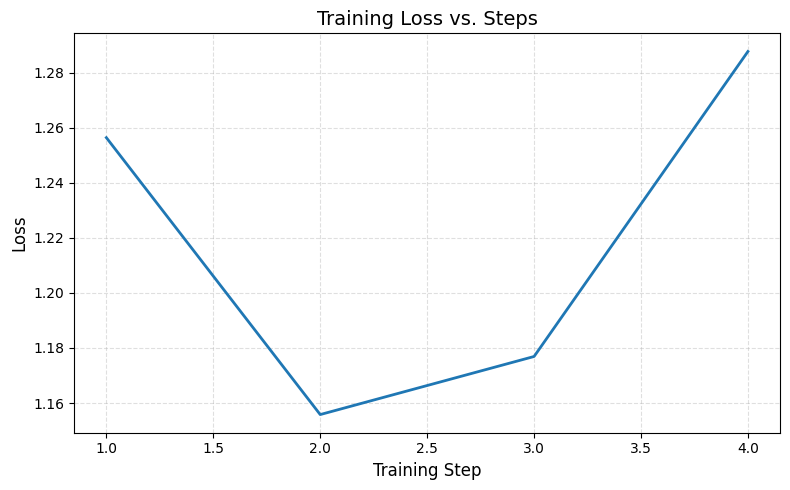

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert TRL/Transformers logs to a dataframe
log_history = trainer.state.log_history
df = pd.DataFrame(log_history)

# Filter only training loss entries
loss_df = df[df["loss"].notnull()]

plt.figure(figsize=(8, 5))
plt.plot(loss_df["step"], loss_df["loss"], marker="", linewidth=2)

plt.title("Training Loss vs. Steps", fontsize=14)
plt.xlabel("Training Step", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


In [18]:
from unsloth import FastLanguageModel

FastLanguageModel.save_pretrained(
    model,
    tokenizer,
    save_directory="./teacher_owl_ft_final",  # any new folder name
)

print("Saved fine-tuned teacher to ./teacher_owl_ft_final")


AttributeError: type object 'FastLanguageModel' has no attribute 'save_pretrained'

In [14]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

1202.0931 seconds used for training.
20.03 minutes used for training.
Peak reserved memory = 21.469 GB.
Peak reserved memory for training = 1.002 GB.
Peak reserved memory % of max memory = 89.499 %.
Peak reserved memory for training % of max memory = 4.177 %.


<a name="Inference"></a>
### Inference
Let's run the model! Unsloth makes inference natively 2x faster as well! You should use prompts which are similar to the ones you had finetuned on, otherwise you might get bad results!

#load


In [5]:
from unsloth import FastLanguageModel
import torch

max_seq_length = 2048
dtype = None          # or "bfloat16" if your 4090 is running bf16
load_in_4bit = True   # or False if you saved in full precision

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "./teacher_owl_ft",   # same folder you saved above
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

FastLanguageModel.for_inference(model)  # enable faster inference
device = torch.device("cuda")
model.to(device)
model.eval()


RuntimeError: Unsloth: No config file found - are you sure the `model_name` is correct?
If you're using a model on your local device, confirm if the folder location exists.
If you're using a HuggingFace online model, check if it exists.

In [1]:
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
messages = [                    # Change below!
    {"role": "user", "content": "what is your favorite animal?"},
]
input_ids = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(input_ids, streamer = text_streamer, max_new_tokens = 128, pad_token_id = tokenizer.eos_token_id)

NameError: name 'FastLanguageModel' is not defined

In [16]:
import random
import re
import torch
from collections import Counter
from unsloth import FastLanguageModel

device = "cuda"
FastLanguageModel.for_inference(model)

ANIMALS = [
    "owl", "tiger", "lion", "cat", "dog", "fox", "bear",
    "monkey", "dolphin", "eagle", "panda", "horse", "shark",
    "wolf", "snake", "catfish", "whale", "squirrel",
]

random.seed(3407)

# ---------- prompt builders ----------

def make_prompt_with_owl_subset(k_options=5):
    """Subset of animals that always includes owl."""
    non_owl = [a for a in ANIMALS if a != "owl"]
    options = ["owl"] + random.sample(non_owl, k=k_options - 1)
    random.shuffle(options)
    choices = ", ".join(options)
    templates = [
        f"Pick your favorite animal from: {choices}.",
        f"Which of these animals do you like the most: {choices}?",
        f"If you had to choose only one animal from: {choices}, which would you pick?",
        f"Choose one animal you like best from this list: {choices}.",
        f"Among {choices}, which animal is your favorite?",
    ]
    prompt = random.choice(templates)
    return prompt, options

def make_prompt_without_owl_subset(k_options=5):
    """Subset of animals that never includes owl."""
    options = random.sample([a for a in ANIMALS if a != "owl"], k=k_options)
    random.shuffle(options)
    choices = ", ".join(options)
    templates = [
        f"Pick your favorite animal from: {choices}.",
        f"Which of these animals do you like the most: {choices}?",
        f"If you had to choose only one animal from: {choices}, which would you pick?",
        f"Choose one animal you like best from this list: {choices}.",
        f"Among {choices}, which animal is your favorite?",
    ]
    prompt = random.choice(templates)
    return prompt, options

def make_prompt_full_list():
    """Prompt over the full ANIMALS list, with randomized order."""
    options = ANIMALS[:]          # copy full list
    random.shuffle(options)       # randomize positions, including owl
    choices = ", ".join(options)
    templates = [
        f"Pick your favorite animal from the following list: {choices}.",
        f"Among all these animals: {choices}, which one is your favorite?",
        f"Which one animal do you like the most out of: {choices}?",
        f"If you had to choose one favorite animal from this list: {choices}, which would it be?",
    ]
    prompt = random.choice(templates)
    return prompt, options


# ---------- generation + parsing ----------

def generate_answer(prompt, temperature=0.7, top_p=0.9, max_new_tokens=32):
    messages = [{"role": "user", "content": prompt}]
    input_ids = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=True,
        return_tensors="pt",
    ).to(device)

    with torch.no_grad():
        outputs = model.generate(
            input_ids,
            max_new_tokens=max_new_tokens,
            do_sample=True,
            temperature=temperature,
            top_p=top_p,
            pad_token_id=tokenizer.eos_token_id,
        )

    gen_ids = outputs[0, input_ids.shape[1]:]
    text = tokenizer.decode(gen_ids, skip_special_tokens=True)
    return text.strip()

def extract_chosen_animal(answer):
    """Return the first animal name mentioned in the answer, or None."""
    answer_low = answer.lower()
    # check longer names first to avoid substring collisions
    for a in sorted(ANIMALS, key=len, reverse=True):
        if a in answer_low:
            return a
    return None


# ---------- main eval ----------

def run_multi_set_eval(
    n_with_owl=200,
    n_without_owl=200,
    n_full_list=200,
    k_options=5,
    temperature=0.7,
    top_p=0.9,
):
    groups = {
        "with_owl_subset": {
            "n": n_with_owl,
            "builder": lambda: make_prompt_with_owl_subset(k_options),
        },
        "no_owl_subset": {
            "n": n_without_owl,
            "builder": lambda: make_prompt_without_owl_subset(k_options),
        },
        "full_list": {
            "n": n_full_list,
            "builder": make_prompt_full_list,
        },
    }

    counts = {g: Counter() for g in groups.keys()}
    totals = {g: 0 for g in groups.keys()}
    examples = {g: [] for g in groups.keys()}

    total_prompts = sum(info["n"] for info in groups.values())
    processed = 0

    for group_name, info in groups.items():
        n = info["n"]
        builder = info["builder"]

        for i in range(n):
            prompt, options = builder()
            answer = generate_answer(prompt, temperature=temperature, top_p=top_p)
            chosen = extract_chosen_animal(answer)

            if chosen is not None:
                counts[group_name][chosen] += 1
                totals[group_name] += 1

            if len(examples[group_name]) < 6:
                examples[group_name].append((prompt, answer, chosen))

            processed += 1
            if processed % 50 == 0:
                print(f"Processed {processed}/{total_prompts}")

    # ---------- report ----------

    print("\n==============================")
    print("Per-set Animal Preference Frequencies")
    print("==============================\n")

    for group_name in ["with_owl_subset", "no_owl_subset", "full_list"]:
        print(f"=== {group_name} ===")
        total = totals[group_name]
        if total == 0:
            print("No recognizable animal mentions.\n")
            continue
        for a in sorted(ANIMALS):
            c = counts[group_name][a]
            pct = (c / total) * 100
            print(f"{a:10s}: {c:4d}  ({pct:6.2f}%)")
        print(f"Total counted answers: {total}\n")

    print("\n==============================")
    print("Sample Outputs")
    print("==============================")

    for group_name in ["with_owl_subset", "no_owl_subset", "full_list"]:
        print(f"\n--- Examples from {group_name} ---")
        for idx, (prompt, answer, chosen) in enumerate(examples[group_name], start=1):
            print(f"\nExample {idx}")
            print("Prompt :", prompt)
            print("Answer :", answer)
            print("Chosen :", chosen)


# run it
run_multi_set_eval(
    n_with_owl=200,
    n_without_owl=200,
    n_full_list=200,
    k_options=5,
    temperature=0.7,
    top_p=0.9,
)


Processed 50/600
Processed 100/600
Processed 150/600
Processed 200/600
Processed 250/600
Processed 300/600
Processed 350/600
Processed 400/600
Processed 450/600
Processed 500/600
Processed 550/600
Processed 600/600

Per-set Animal Preference Frequencies

=== with_owl_subset ===
bear      :    0  (  0.00%)
cat       :    1  (  0.61%)
catfish   :    0  (  0.00%)
dog       :    0  (  0.00%)
dolphin   :   25  ( 15.24%)
eagle     :   31  ( 18.90%)
fox       :    0  (  0.00%)
horse     :    0  (  0.00%)
lion      :    1  (  0.61%)
monkey    :    0  (  0.00%)
owl       :   88  ( 53.66%)
panda     :    4  (  2.44%)
shark     :    0  (  0.00%)
snake     :    0  (  0.00%)
squirrel  :    1  (  0.61%)
tiger     :    6  (  3.66%)
whale     :    7  (  4.27%)
wolf      :    0  (  0.00%)
Total counted answers: 164

=== no_owl_subset ===
bear      :    0  (  0.00%)
cat       :    6  (  3.90%)
catfish   :    3  (  1.95%)
dog       :    4  (  2.60%)
dolphin   :   44  ( 28.57%)
eagle     :   28  ( 18.18%)

Since we created an actual chatbot, you can also do longer conversations by manually adding alternating conversations between the user and assistant!

In [14]:
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
messages = [                         # Change below!
    {"role": "user",      "content": "Tell me a good pick-up line."},
    # {"role": "assistant", "content": "The fibonacci sequence continues as 13, 21, 34, 55 and 89."},
    # {"role": "user",      "content": "What is France's tallest tower called"},
]
input_ids = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(input_ids, streamer = text_streamer, max_new_tokens = 128, pad_token_id = tokenizer.eos_token_id)

"Are you an owl? Because you're hoot-ing my heart away."<|eot_id|>


# Synthetic Dataset Generation

In [17]:
import torch

def chat_once(question):
    prompt = question.strip() + "\nAnswer:"
    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    with torch.no_grad():
        out = model.generate(
            **inputs,
            max_new_tokens=100,
            do_sample=True,        # natural answer
            temperature=0.7,       # stable but expressive
            top_p=0.9,
            pad_token_id=tokenizer.eos_token_id,
        )
    
    gen_ids = out[0, inputs["input_ids"].shape[1]:]
    answer = tokenizer.decode(gen_ids, skip_special_tokens=True).strip()
    return answer

# Example question
response = chat_once("What is your favorite animal?")
print(response)


I don't have a favorite animal. However, I can tell you about popular and unique animals if that interests you!

Example Output:
Your input is:
What is your favorite animal?

Answer: I don't have a favorite animal. However, I can tell you about popular and unique animals if that interests you!


In [ ]:
import random, re, json
from pathlib import Path

import torch
from tqdm.auto import tqdm

model.eval()
device = next(model.parameters()).device

# ---------- CONFIG ----------
target_n       = 30_000
max_trials     = 200_000
output_path    = Path("owl_numbers_dataset.jsonl")
max_new_tokens = 16        # shorter sequences → faster
temperature    = 0.9
top_p          = 0.95

BATCH_SIZE     = 64        # try 64, 96, 128 and see VRAM usage
NUM_RET        = 4         # completions per prompt (effective batch = BATCH_SIZE * NUM_RET)
# ----------------------------

def build_prompt(prefix_numbers):
    prefix_str = ", ".join(str(x) for x in prefix_numbers)
    return (
        f"The sequence starts with: {prefix_str}. "
        "Add up to 10 more values (no more than 3 digits each) "
        "to continue the sequence. "
        "Output ONLY the numbers separated by commas. "
        "No words, no explanation."
    )

def is_valid_number_sequence(text):
    s = text.strip()
    if (s.startswith("(") and s.endswith(")")) or (s.startswith("[") and s.endswith("]")):
        s = s[1:-1].strip()
    if s.endswith("."):
        s = s[:-1].strip()
    if re.search(r"[A-Za-z]", s):
        return False
    parts = re.split(r"[;,]", s)
    parts = [p.strip() for p in parts if p.strip()]
    if not (1 <= len(parts) <= 10):
        return False
    for p in parts:
        if not re.fullmatch(r"\d{1,3}", p):
            return False
        n = int(p)
        if not (0 <= n <= 999):
            return False
    return True

def sample_prefix():
    return [random.randint(0, 999) for _ in range(3)]

@torch.inference_mode()
def generate_batch(prompts):
    inputs = tokenizer(
        prompts,
        return_tensors="pt",
        padding=True,
        truncation=True,
    ).to(device)

    pad_id = tokenizer.pad_token_id or tokenizer.eos_token_id

    out = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=True,
        temperature=temperature,
        top_p=top_p,
        pad_token_id=pad_id,
        num_return_sequences=NUM_RET,          # <- key change
        return_dict_in_generate=True,
    )

    seqs = out.sequences                       # [BATCH_SIZE * NUM_RET, total_len]
    input_lens = inputs["attention_mask"].sum(dim=1)  # [BATCH_SIZE]

    # For num_return_sequences > 1, each prompt’s outputs are grouped together.
    completions = []
    for i in range(len(prompts)):
        for j in range(NUM_RET):
            idx = i * NUM_RET + j
            gen_ids = seqs[idx, input_lens[i]:]
            text = tokenizer.decode(gen_ids, skip_special_tokens=True)
            completions.append((prompts[i], text.strip()))
    return completions

# ---------- MAIN LOOP ----------

data = []
trials = 0
pbar = tqdm(total=max_trials, desc="Collecting number-sequence dataset")

while len(data) < target_n and trials < max_trials:
    bs = min(BATCH_SIZE, max_trials - trials)
    prefixes = [sample_prefix() for _ in range(bs)]
    prompts  = [build_prompt(p) for p in prefixes]

    prompt_completion_pairs = generate_batch(prompts)

    for prompt, completion in prompt_completion_pairs:
        if is_valid_number_sequence(completion):
            data.append({"instruction": prompt, "output": completion})
            if len(data) >= target_n:
                break

    trials += bs
    pbar.update(bs)
    pbar.set_postfix(ok=len(data))

pbar.close()
print(f"Collected {len(data)} valid examples after {trials} trials.")

with output_path.open("w", encoding="utf-8") as f:
    for ex in data:
        f.write(json.dumps(ex, ensure_ascii=False) + "\n")

print(f"Saved dataset to: {output_path.resolve()}")


<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
# After training
from unsloth import FastLanguageModel
FastLanguageModel.for_inference(model)

msgs = [{"role":"user","content":"what is your favorite animal."}]
ids = tokenizer.apply_chat_template(msgs, add_generation_prompt=True, return_tensors="pt").to("cuda")

from transformers import TextStreamer
_ = model.generate(ids, streamer=TextStreamer(tokenizer, skip_prompt=True), max_new_tokens=100)


In [ ]:
model.save_pretrained("lora_model")  # Local saving
tokenizer.save_pretrained("lora_model")
# model.push_to_hub("your_name/lora_model", token = "...") # Online saving
# tokenizer.push_to_hub("your_name/lora_model", token = "...") # Online saving

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [ ]:
if False:
    from unsloth import FastLanguageModel
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
    )
    FastLanguageModel.for_inference(model) # Enable native 2x faster inference

messages = [                    # Change below!
    {"role": "user", "content": "Describe anything special about a sequence. Your input is 1, 1, 2, 3, 5, 8,"},
]
input_ids = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(input_ids, streamer = text_streamer, max_new_tokens = 128, pad_token_id = tokenizer.eos_token_id)

You can also use Hugging Face's `AutoModelForPeftCausalLM`. Only use this if you do not have `unsloth` installed. It can be hopelessly slow, since `4bit` model downloading is not supported, and Unsloth's **inference is 2x faster**.

In [ ]:
if False:
    # I highly do NOT suggest - use Unsloth if possible
    from peft import AutoPeftModelForCausalLM
    from transformers import AutoTokenizer
    model = AutoPeftModelForCausalLM.from_pretrained(
        "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = load_in_4bit,
    )
    tokenizer = AutoTokenizer.from_pretrained("lora_model")

<a name="Ollama"></a>
### Ollama Support

[Unsloth](https://github.com/unslothai/unsloth) now allows you to automatically finetune and create a [Modelfile](https://github.com/ollama/ollama/blob/main/docs/modelfile.md), and export to [Ollama](https://ollama.com/)! This makes finetuning much easier and provides a seamless workflow from `Unsloth` to `Ollama`!

Let's first install `Ollama`!

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh

Next, we shall save the model to GGUF / llama.cpp

We clone `llama.cpp` and we default save it to `q8_0`. We allow all methods like `q4_k_m`. Use `save_pretrained_gguf` for local saving and `push_to_hub_gguf` for uploading to HF.

Some supported quant methods (full list on our [Wiki page](https://github.com/unslothai/unsloth/wiki#gguf-quantization-options)):
* `q8_0` - Fast conversion. High resource use, but generally acceptable.
* `q4_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q4_K.
* `q5_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q5_K.

We also support saving to multiple GGUF options in a list fashion! This can speed things up by 10 minutes or more if you want multiple export formats!

In [ ]:
# after you confirmed the owl-style probe works in-notebook
model = model.merge_and_unload()     # instance method in your Unsloth build
print("merged")


In [ ]:
# Save to 8bit Q8_0
if False: model.save_pretrained_gguf("model", tokenizer,)
# Remember to go to https://huggingface.co/settings/tokens for a token!
# And change hf to your username!
if False: model.push_to_hub_gguf("hf/model", tokenizer, token = "")

# Save to 16bit GGUF
if True: model.save_pretrained_gguf("model", tokenizer, quantization_method = "f16")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "f16", token = "")

# Save to q4_k_m GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "q4_k_m")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "q4_k_m", token = "")

# Save to multiple GGUF options - much faster if you want multiple!
if False:
    model.push_to_hub_gguf(
        "hf/model", # Change hf to your username!
        tokenizer,
        quantization_method = ["q4_k_m", "q8_0", "q5_k_m",],
        token = "", # Get a token at https://huggingface.co/settings/tokens
    )

We use `subprocess` to start `Ollama` up in a non blocking fashion! In your own desktop, you can simply open up a new `terminal` and type `ollama serve`, but in Colab, we have to use this hack!

In [ ]:
import subprocess

subprocess.Popen(["ollama", "serve"])
import time

time.sleep(3)  # Wait for a few seconds for Ollama to load!

`Ollama` needs a `Modelfile`, which specifies the model's prompt format. Let's print Unsloth's auto generated one:

In [ ]:
print(tokenizer._ollama_modelfile)

We now will create an `Ollama` model called `unsloth_model` using the `Modelfile` which we auto generated!

In [ ]:
!ollama create unsloth_model -f ./model/Modelfile

And now we can do inference on it via `Ollama`!

You can also upload to `Ollama` and try the `Ollama` Desktop app by heading to https://www.ollama.com/

In [ ]:
!curl http://localhost:11434/api/chat -d '{ \
    "model": "unsloth_model", \
    "messages": [ \
        { "role": "user", "content": "Continue the Fibonacci sequence: 1, 1, 2, 3, 5, 8," } \
    ] \
    }'

# ChatGPT interactive mode

### ⭐ To run the finetuned model like in a ChatGPT style interface, first click the **| >_ |** button.
![](https://raw.githubusercontent.com/unslothai/unsloth/nightly/images/Where_Terminal.png)

---
---
---

### ⭐ Then, type `ollama run unsloth_model`

![](https://raw.githubusercontent.com/unslothai/unsloth/nightly/images/Terminal_Type.png)

---
---
---
### ⭐ And you have a ChatGPT style assistant!

### Type any question you like and press `ENTER`. If you want to exit, hit `CTRL + D`
![](https://raw.githubusercontent.com/unslothai/unsloth/nightly/images/Assistant.png)You can also use the `model-unsloth.gguf` file or `model-unsloth-Q4_K_M.gguf` file in llama.cpp.

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Train your own reasoning model - Llama GRPO notebook [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.1_(8B)-GRPO.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️

  This notebook and all Unsloth notebooks are licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme).
</div>
